# Implementation of ANN using Keras

In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [4]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST data

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
(X_train_full, y_train_full) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train_full[0].shape

(28, 28)

In [12]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000] / 255.,X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

#scale the test set as well
X_test = X_test / 255.

In [13]:
# TRAIN - 55000
# TEST - 10000
# VAL - 5000

In [14]:
len(X_train_full[5000:])

55000

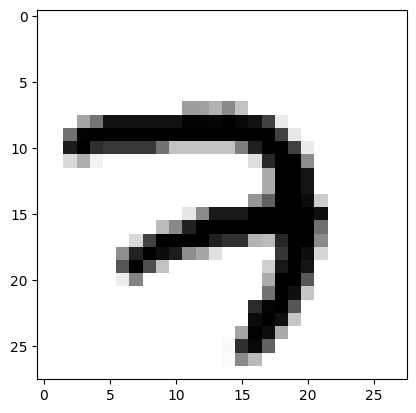

In [15]:
# Lets view some data

plt.imshow(X_train[0] , cmap = 'binary')
plt.show()

<Axes: >

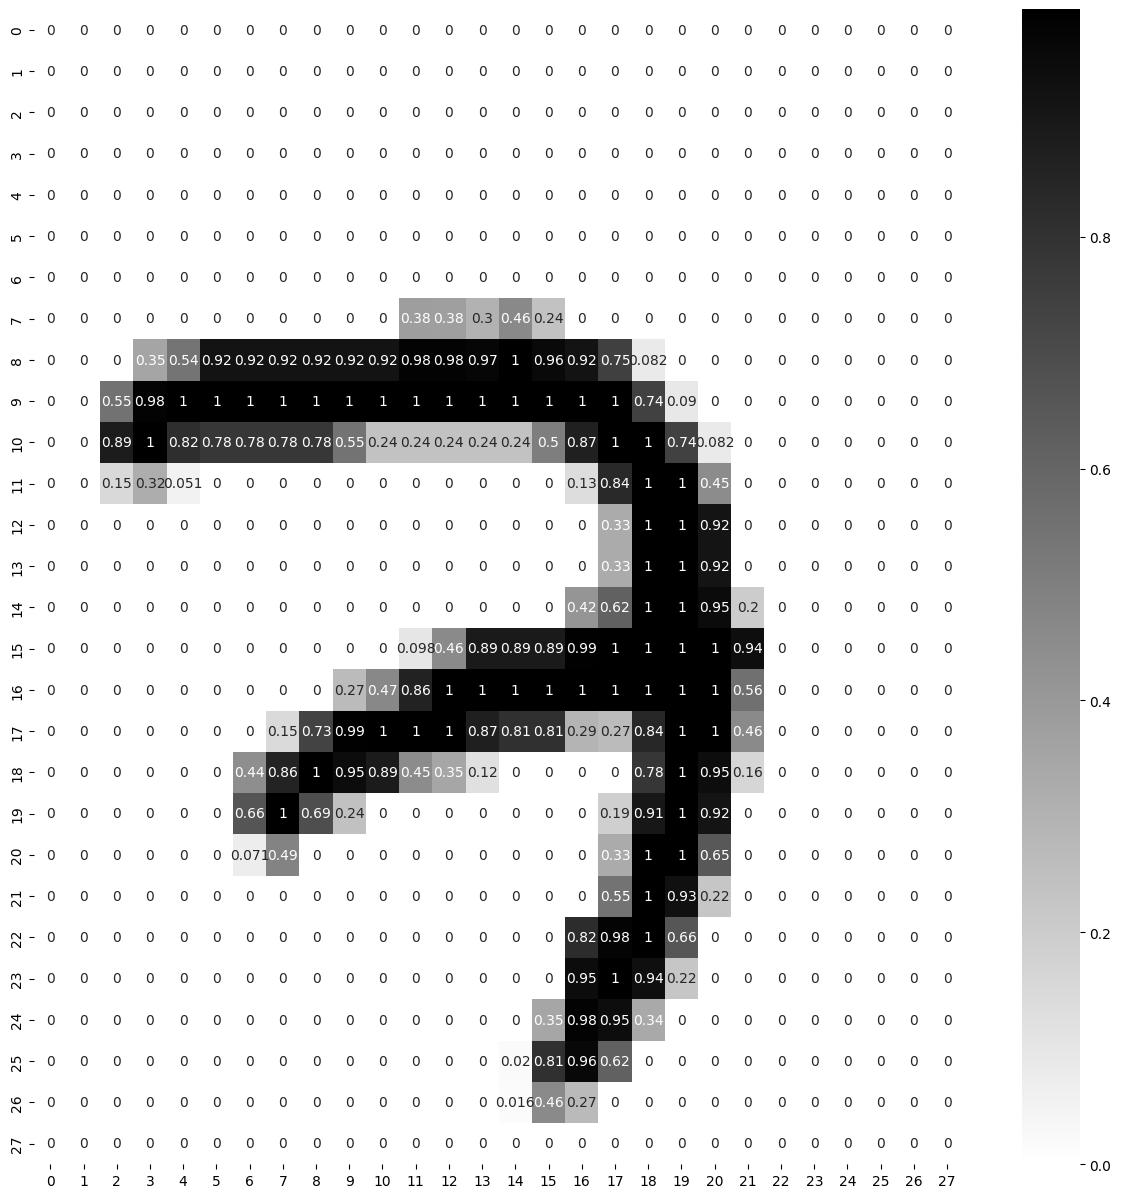

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0],annot = True , cmap = 'binary')

In [17]:
28*28

784

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 267,810
Trainable params: 267,210
Non-trainable params: 600
________________________________________________

In [ ]:
# firstLayer * secondLayer + bias
784*300 + 300 , 300 * 100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
print("shape\n", weights.shape , "\n")
weights

shape
 (784, 300) 



array([[-0.02706445,  0.008449  , -0.00216915, ...,  0.00375528,
         0.00289031,  0.015624  ],
       [-0.05007026,  0.01866778,  0.01422723, ..., -0.07117337,
         0.05407625,  0.03827194],
       [-0.02788283,  0.00588689, -0.03605923, ..., -0.03875902,
        -0.04797061,  0.0617747 ],
       ...,
       [ 0.02021299, -0.02306968,  0.05975901, ...,  0.06684083,
         0.03077173, -0.06575311],
       [ 0.06764114,  0.01295278,  0.05531406, ..., -0.03186565,
        -0.04586965, -0.04947866],
       [-0.03834825,  0.07302891,  0.04066589, ..., -0.00157434,
        -0.01943976,  0.07424273]], dtype=float32)

In [ ]:
print("shape\n", biases.shape , "\n")
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3480 - accuracy: 0.8985 - val_loss: 0.1654 - val_accuracy: 0.9558
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1637 - accuracy: 0.9523 - val_loss: 0.1215 - val_accuracy: 0.9646
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1214 - accuracy: 0.9647 - val_loss: 0.1017 - val_accuracy: 0.9696
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0982 - accuracy: 0.9716 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0798 - accuracy: 0.9765 - val_loss: 0.0857 - val_accuracy: 0.9730
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9805 - val_loss: 0.0791 - val_accuracy: 0.9740
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9831 - val_loss: 0.0779 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.348021,0.898509,0.165420,0.9558
1,0.163749,0.952327,0.121459,0.9646
2,0.121389,0.964655,0.101670,0.9696
3,0.098173,0.971564,0.090580,0.9724
4,0.079800,0.976509,0.085679,0.9730
5,0.067516,0.980455,0.079073,0.9740
6,0.057860,0.983145,0.077949,0.9754
7,0.049676,0.985873,0.075689,0.9766
8,0.042638,0.988418,0.072046,0.9772
9,0.037649,0.990000,0.070253,0.9782


<Axes: >

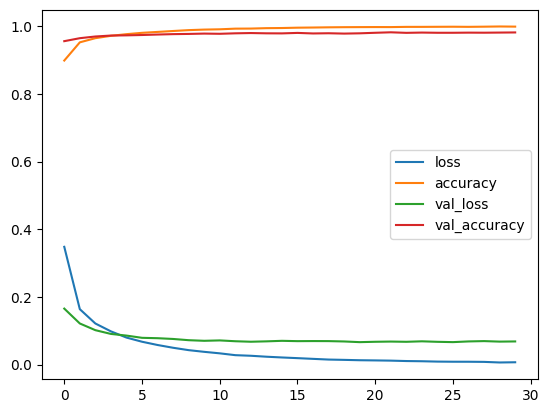

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9812


[0.07305523008108139, 0.9811999797821045]

# SAMPLE CHECK - TEST DATA

In [ ]:
X_new  = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

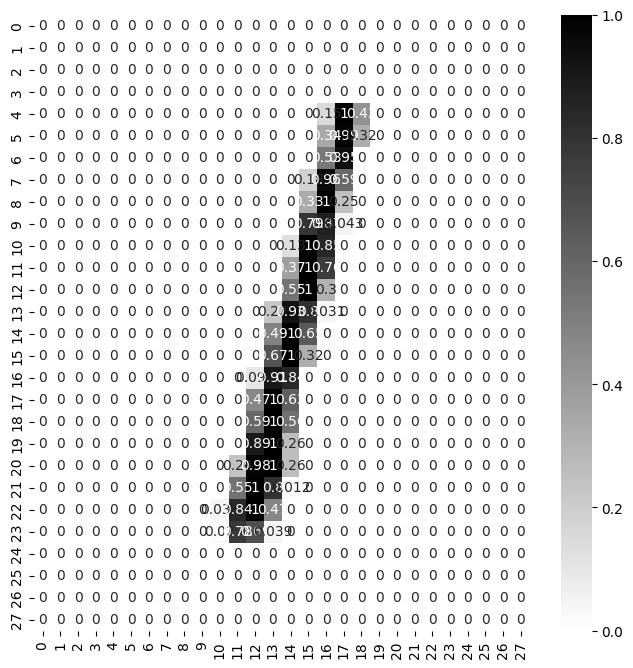

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2] , annot = True  ,cmap = 'binary')

In [ ]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[9.38250741e-05, 1.41920373e-05, 3.38170248e-05, 1.89397048e-04,
        3.42032322e-08, 1.35471746e-05, 1.20137083e-05, 9.99613702e-01,
        1.25021003e-07, 2.94433466e-05],
       [6.84790029e-06, 9.24418928e-05, 9.99897599e-01, 1.44952833e-06,
        7.12158821e-09, 3.76691617e-07, 8.88132945e-07, 1.13784315e-10,
        3.86131319e-07, 2.85424653e-11],
       [4.51988058e-07, 9.99973774e-01, 2.74448325e-07, 2.99548262e-08,
        1.40259408e-05, 9.52061782e-07, 3.27990688e-06, 2.62244453e-06,
        4.56470889e-06, 8.81353728e-08]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob , axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

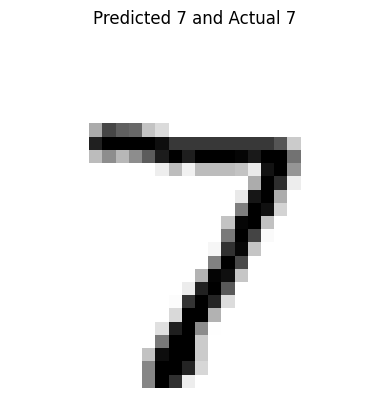

##################################################


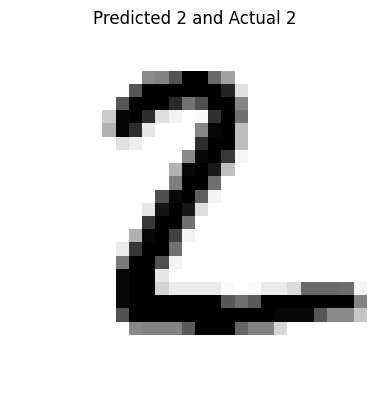

##################################################


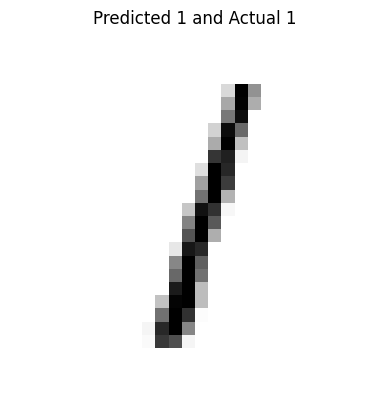

##################################################


In [ ]:
# plot
for data , pred , actual_data in zip(X_new , y_pred , actual):
  plt.imshow(data,cmap='binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis('off')
  plt.show()
  print("#"*50)

In [25]:
#METHOD - 2 with regularization and dropout

In [26]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_regularizer= regularizers.l2(1e-4))) #lasso regularization
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_regularizer= regularizers.L1L2(l1=1e-5,l2=1e-4))) #elastic net regularization
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [29]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0887 - accuracy: 0.6572 - val_loss: 0.4441 - val_accuracy: 0.8898
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5597 - accuracy: 0.8352 - val_loss: 0.3371 - val_accuracy: 0.9110
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4572 - accuracy: 0.8688 - val_loss: 0.2821 - val_accuracy: 0.9250
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4032 - accuracy: 0.8874 - val_loss: 0.2502 - val_accuracy: 0.9336
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3695 - accuracy: 0.8974 - val_loss: 0.2282 - val_accuracy: 0.9432
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.9075 - val_loss: 0.2118 - val_accuracy: 0.9486
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3187 - accuracy: 0.9132 - val_loss: 0.1994 - val_accuracy: